In [1]:
import sqlite3
import pandas as pd

# Specify the path to the SQLite file using a raw string literal
db_path = r"C:\Users\Jonat\Desktop\Advanced Methods in Applied Statistics\Data\Project\nba.sqlite"

# Connect to the SQLite database
conn = sqlite3.connect(db_path)
# cursor = conn.cursor()

# Define the SQL query to select all data from the 'game' table
query = "SELECT * FROM game;"

# Execute the query and load the data into a DataFrame
game_df = pd.read_sql_query(query, conn)

# Display the first few rows of the DataFrame
print(game_df.head())

# Close the connection
conn.close()



  season_id team_id_home team_abbreviation_home           team_name_home  \
0     21946   1610610035                    HUS          Toronto Huskies   
1     21946   1610610034                    BOM        St. Louis Bombers   
2     21946   1610610032                    PRO  Providence Steamrollers   
3     21946   1610610025                    CHS            Chicago Stags   
4     21946   1610610028                    DEF          Detroit Falcons   

      game_id            game_date matchup_home wl_home  min  fgm_home  ...  \
0  0024600001  1946-11-01 00:00:00  HUS vs. NYK       L    0      25.0  ...   
1  0024600003  1946-11-02 00:00:00  BOM vs. PIT       W    0      20.0  ...   
2  0024600002  1946-11-02 00:00:00  PRO vs. BOS       W    0      21.0  ...   
3  0024600004  1946-11-02 00:00:00  CHS vs. NYK       W    0      21.0  ...   
4  0024600005  1946-11-02 00:00:00  DEF vs. WAS       L    0      10.0  ...   

   reb_away  ast_away  stl_away  blk_away  tov_away  pf_away  pts_aw

In [2]:
# Convert the 'game_date' column to datetime
game_df["game_date"] = pd.to_datetime(game_df["game_date"])

# Filter the DataFrame for rows where the game year is 1980 or later
game_df = game_df[game_df["game_date"].dt.year >= 1980]

# Display the first few rows of the filtered DataFrame
print(game_df.head())

      season_id team_id_home team_abbreviation_home          team_name_home  \
13648     21979   1610612752                    NYK         New York Knicks   
13649     21979   1610612757                    POR  Portland Trail Blazers   
13650     21979   1610612744                    GOS   Golden State Warriors   
13651     21979   1610612762                    UTH               Utah Jazz   
13652     21979   1610612754                    IND          Indiana Pacers   

          game_id  game_date matchup_home wl_home  min  fgm_home  ...  \
13648  0027900429 1980-01-01  NYK vs. SAN       W  240      49.0  ...   
13649  0027900428 1980-01-01  POR vs. WAS       W  240      47.0  ...   
13650  0027900434 1980-01-02  GOS vs. POR       W  240      42.0  ...   
13651  0027900430 1980-01-02  UTH vs. KCK       L  265      43.0  ...   
13652  0027900436 1980-01-02  IND vs. LAL       L  240      47.0  ...   

       reb_away  ast_away  stl_away  blk_away  tov_away  pf_away  pts_away  \
13648   

In [6]:
import matplotlib

def reset_plt(ticksize,fontsize):
    plt.style.use('seaborn-v0_8-white')
    plt.rcParams['xtick.labelsize'] = ticksize
    plt.rcParams['ytick.labelsize'] = ticksize
    plt.rcParams['font.size'] = fontsize
    plt.rcParams['mathtext.fontset'] = 'stix'
    plt.rcParams['font.family'] = 'STIXGeneral'
    plt.rcParams['legend.facecolor'] = 'white'
    plt.rcParams['axes.formatter.limits'] = (-1,3)
    plt.rcParams['axes.linewidth'] = 2.25
    

def put_ticks(this_fig,this_ax):
    this_ax.xaxis.set_tick_params(which = 'major', direction = 'in', width = 2.5, length = 12, zorder = 1, top = True)
    this_ax.yaxis.set_tick_params(which = 'major', direction = 'in', width = 2.5, length = 12, zorder = 1, right = True)
    this_ax.xaxis.set_tick_params(which = 'minor', direction = 'in', width = 1.5, length = 6, zorder = 1, top = True)
    this_ax.yaxis.set_tick_params(which = 'minor', direction = 'in', width = 1.5, length = 6, zorder = 1, right = True)
    dx = -3/72
    dy = -3/72
    y_offset = matplotlib.transforms.ScaledTranslation(0, dy, this_fig.dpi_scale_trans)
    x_offset = matplotlib.transforms.ScaledTranslation(dx, 0, this_fig.dpi_scale_trans)

    for label in this_ax.xaxis.get_majorticklabels():
        label.set_transform(label.get_transform() + y_offset)

    for label in this_ax.yaxis.get_majorticklabels():
        label.set_transform(label.get_transform() + x_offset)

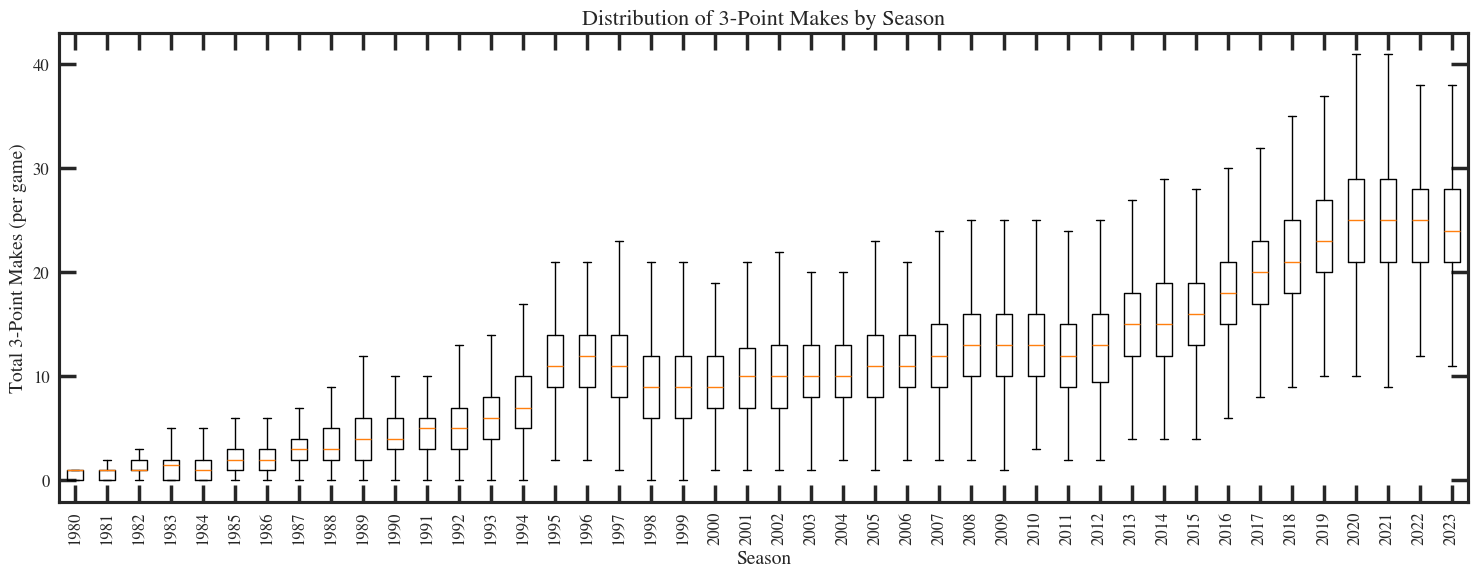

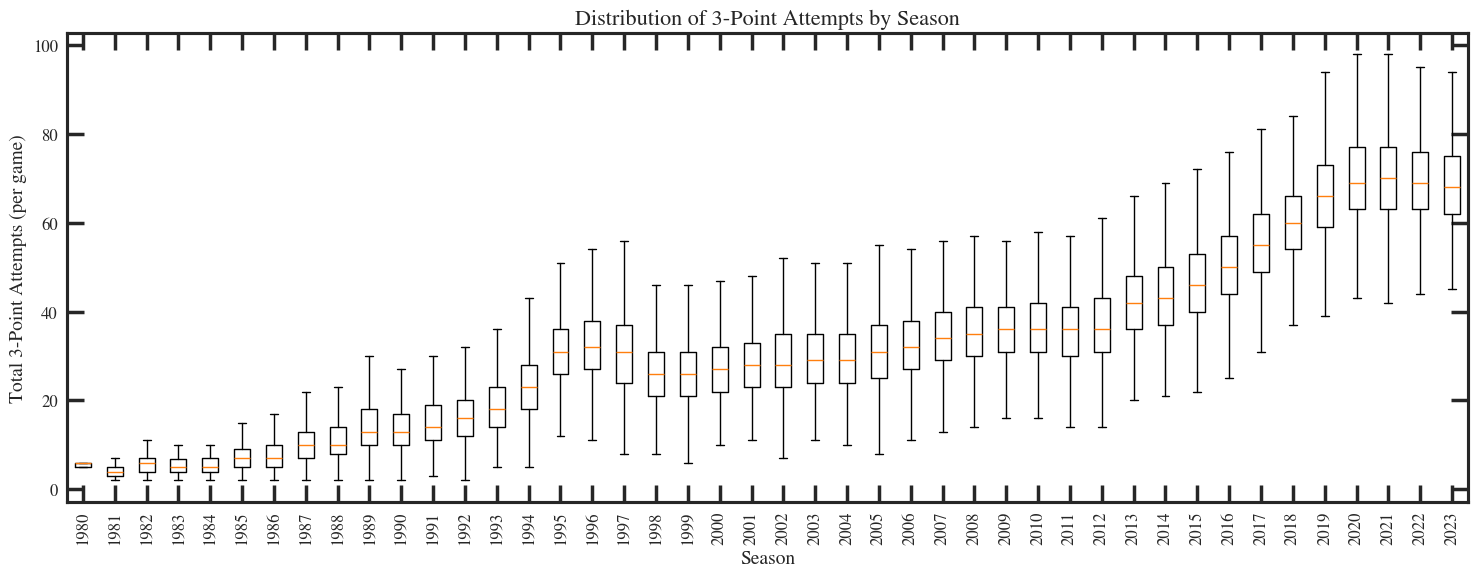

In [7]:
import matplotlib.pyplot as plt

# List the columns in the desired order
columns_to_keep = [
    'team_id_home', 'team_name_home', 'game_id', 'game_date', 'matchup_home',
    'wl_home', 'min', 'fg3m_home', 'fg3a_home', 'fg3_pct_home',
    'team_id_away', 'team_name_away', 'matchup_away', 'wl_away',
    'fg3m_away', 'fg3a_away', 'fg3_pct_away', 'season_type'
]

# Subset the DataFrame to only include these columns in the specified order
game_df = game_df[columns_to_keep]

# remove all rows with na values
df = game_df.dropna()

# Convert game_date to datetime and filter for games from 1980 onward
df["game_date"] = pd.to_datetime(df["game_date"], errors='coerce')
df = df[df["game_date"].dt.year >= 1980]
df["season_id"] = df["game_date"].dt.year

# Calculate total three-point makes and attempts per game
df['fg3m_total'] = df['fg3m_home'] + df['fg3m_away']
df['fg3a_total'] = df['fg3a_home'] + df['fg3a_away']

# Get sorted list of seasons
seasons = sorted(df["season_id"].unique())

# Prepare data grouped by season for box plots
makes_by_season = [df[df["season_id"] == season]['fg3m_total'] for season in seasons]
attempts_by_season = [df[df["season_id"] == season]['fg3a_total'] for season in seasons]

# Reset plot style with desired parameters
reset_plt(ticksize=12, fontsize=14)

# Plot 3-Point Makes distribution using an axis-based plot
fig1, ax1 = plt.subplots(figsize=(15, 6))
ax1.boxplot(makes_by_season, labels=seasons, showfliers=False)
ax1.set_title("Distribution of 3-Point Makes by Season", fontsize=16)
ax1.set_xlabel("Season", fontsize=14)
ax1.set_ylabel("Total 3-Point Makes (per game)", fontsize=14)
plt.setp(ax1.get_xticklabels(), rotation=90)
put_ticks(fig1, ax1)
plt.tight_layout()

# Plot 3-Point Attempts distribution using an axis-based plot
fig2, ax2 = plt.subplots(figsize=(15, 6))
ax2.boxplot(attempts_by_season, labels=seasons, showfliers=False)
ax2.set_title("Distribution of 3-Point Attempts by Season", fontsize=16)
ax2.set_xlabel("Season", fontsize=14)
ax2.set_ylabel("Total 3-Point Attempts (per game)", fontsize=14)
plt.setp(ax2.get_xticklabels(), rotation=90)
put_ticks(fig2, ax2)
plt.tight_layout()

plt.show()

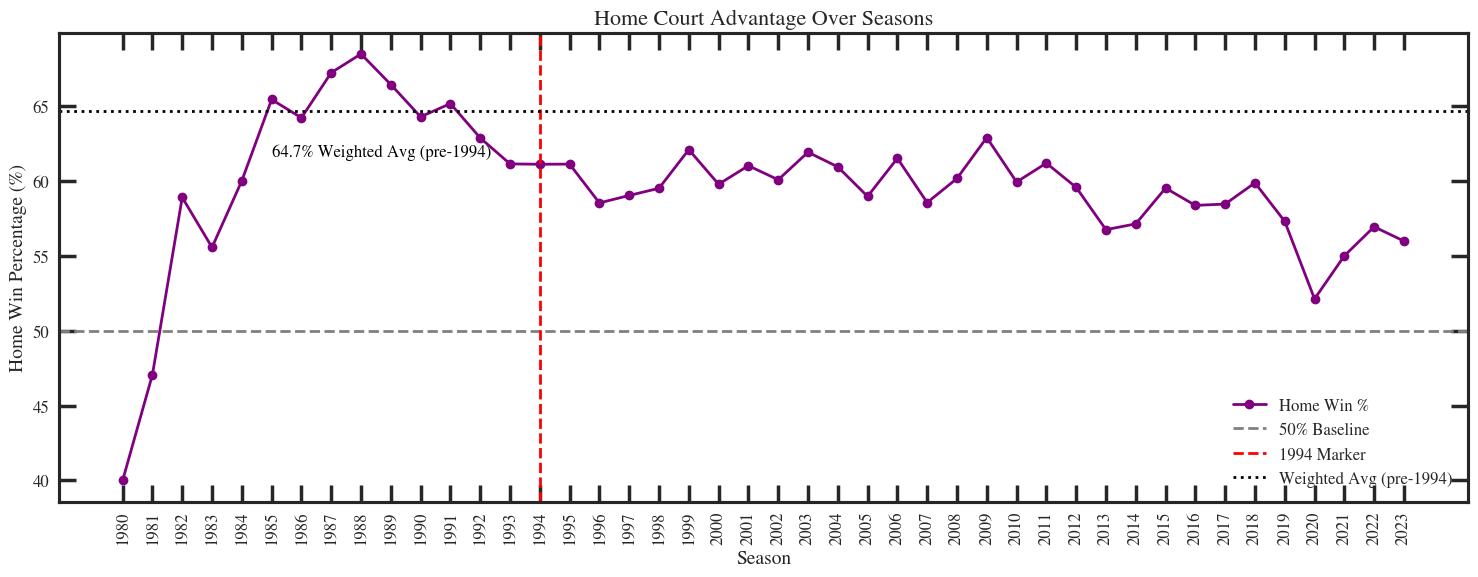

In [22]:
# Apply custom style settings
reset_plt(ticksize=12, fontsize=14)

# Create a binary home win indicator based on 'wl_home' column (W=win, L=loss)
df['home_win'] = df['wl_home'].map({'W': 1, 'L': 0})

# Compute the total number of games and home wins for each season
season_stats = df.groupby('season_id').agg(
    total_games=('home_win', 'count'),
    home_wins=('home_win', 'sum')
).reset_index()

# Calculate home win percentage
season_stats['home_win_pct'] = season_stats['home_wins'] / season_stats['total_games'] * 100

# Compute weighted average home win percentage for seasons before 1994
pre1994 = season_stats[season_stats['season_id'] < 1994]
weighted_avg_pre1994 = (pre1994['home_wins'].sum() / pre1994['total_games'].sum()) * 100

# Create a visualization of home court advantage over seasons
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(season_stats['season_id'], season_stats['home_win_pct'],
        marker='o', linestyle='-', linewidth=2, label="Home Win %", color='purple')

# Add a horizontal line at 50% (neutral baseline)
ax.axhline(50, color='gray', linestyle='--', linewidth=2, label='50% Baseline')

# Add a vertical marker at season 1994
ax.axvline(1994, color='red', linestyle='--', linewidth=2, label="1994 Marker")

# Add a horizontal dotted line at the weighted average (pre-1994)
ax.axhline(weighted_avg_pre1994, color='black', linestyle=':', linewidth=2,
           label="Weighted Avg (pre-1994)")

# Place a text label for the weighted average
# Adjust x=1988 and y-offset (+0.5) as needed for readability
ax.text(1985, weighted_avg_pre1994 - 3.0,
        f"{weighted_avg_pre1994:.1f}% Weighted Avg (pre-1994)",
        color='black', fontsize=12, ha='left')

# Explicitly set the x-ticks to show actual integer years
ax.set_xticks(season_stats['season_id'].unique())
ax.set_xticklabels(season_stats['season_id'].unique(), rotation=90)

# Set titles and labels
ax.set_title("Home Court Advantage Over Seasons", fontsize=16)
ax.set_xlabel("Season", fontsize=14)
ax.set_ylabel("Home Win Percentage (%)", fontsize=14)

# Add legend
ax.legend(fontsize=12)

# Apply custom tick settings
put_ticks(fig, ax)
plt.tight_layout()
plt.show()
